In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/student_data.csv')
df

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8
3,GP,F,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14
4,GP,F,yes,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,yes,no,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9,9,9
391,MS,M,no,no,2.0,4.0,5.0,3.0,4.0,2.0,3.0,15,14,16
392,MS,M,no,no,5.0,5.0,3.0,3.0,3.0,3.0,3.0,8,10,8
393,MS,M,no,no,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11,11,12


### 1-1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


In [4]:
df.isna().sum()

school        0
sex           0
paid          0
activities    0
famrel        1
freetime      2
goout         3
Dalc          4
Walc          2
health        4
absences      3
grade         0
G1            0
G2            0
dtype: int64

In [5]:
df.describe()

,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
count,394.000000,393.000000,392.000000,391.000000,393.000000,391.000000,392.000000,395.000000,395.000000,395.000000
mean,3.944162,3.239186,3.114796,1.470588,2.284987,3.562660,5.676020,10.660759,10.908861,10.713924
std,0.897794,0.994265,1.112397,0.873266,1.287778,1.386949,8.013393,3.719390,3.319195,3.761505
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000
25%,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,8.000000,9.000000
50%,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,13.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,19.000000


school, sex, paid, activities는 object 형태의 범주형 변수이고, 그 외에는 수치형 변수임을 확인할 수 있다. 또한 famrel, freetime, goout, Dalc, Walc, health, absences에 결측값이 존재하는 것을 확인할 수 있다.

In [6]:
obj_col = df.columns[:4]
num_col = df.columns[4:]

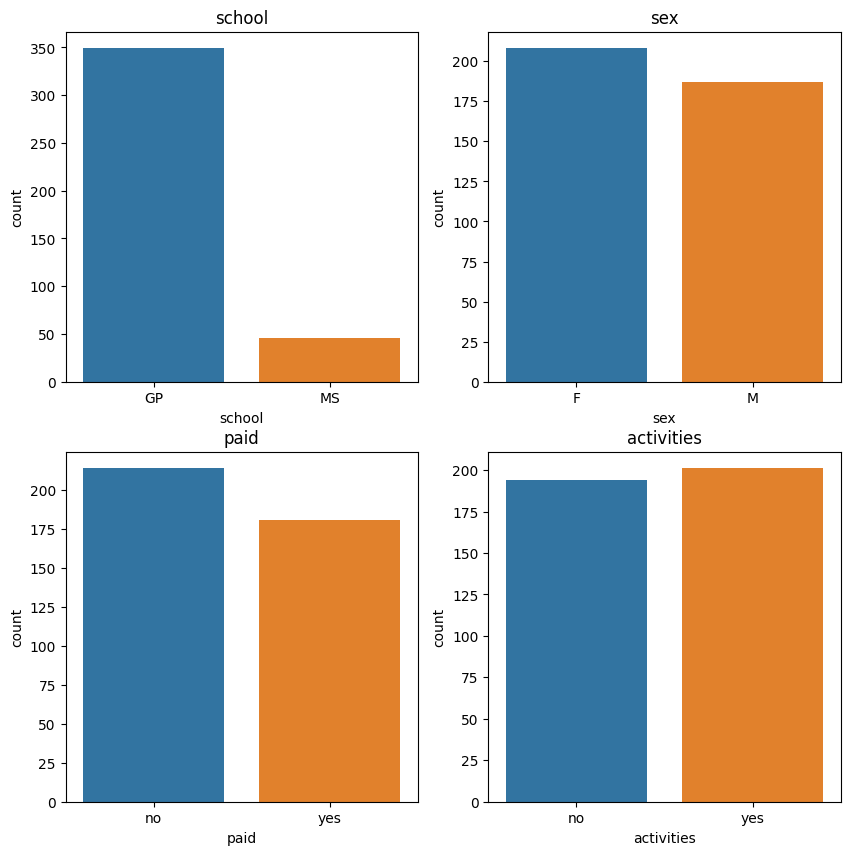

In [7]:
plt.figure(figsize=(10,10))

for idx, col in enumerate(obj_col):
    plt.subplot(2, 2, idx+1)
    plt.title(col)
    sns.countplot(x=df[col], data=df)
    
plt.show();

object형 변수의 범주는 각각 두 가지로 이루어진 것을 확인할 수 있고, school 변수를 제외하면 빈도도 큰 차이가 없는 것을 확인할 수 있다.

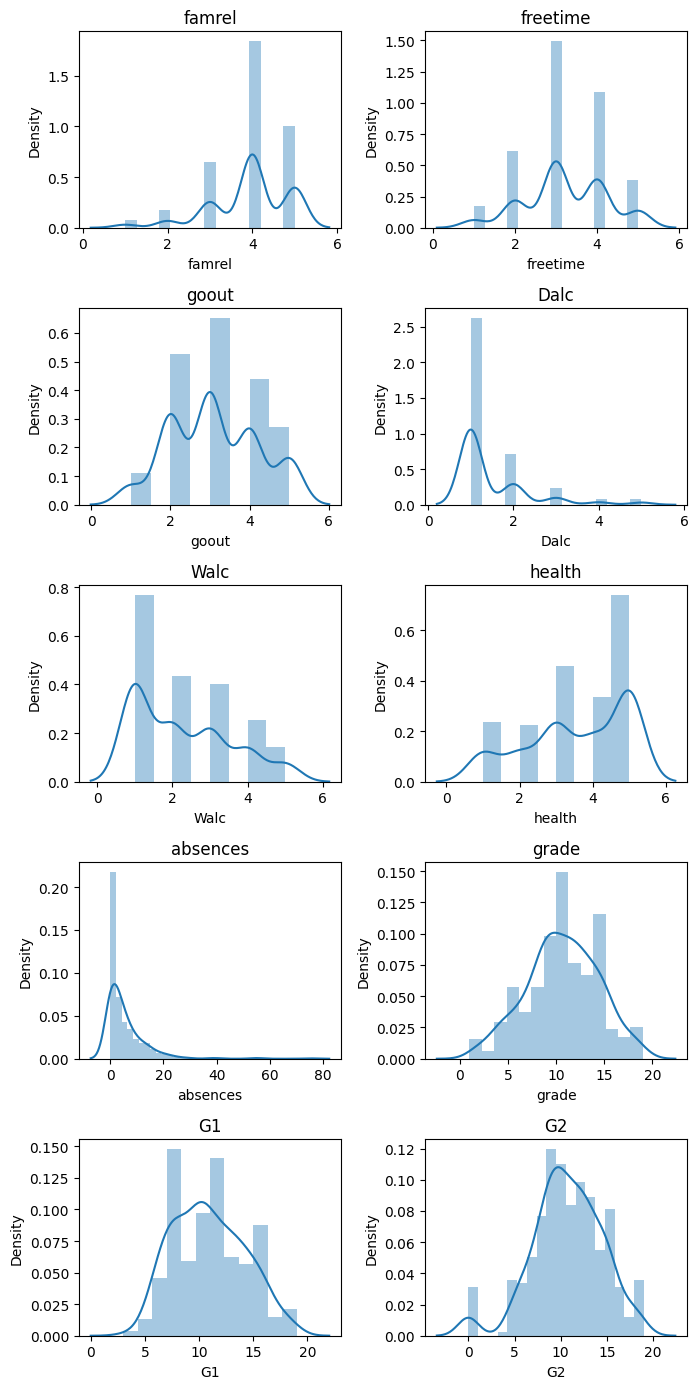

In [8]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(7,14))

for idx, col in enumerate(num_col):
    plt.subplot(5, 2, idx+1)
    plt.title(col)
    sns.distplot(df[col])
    
plt.tight_layout()
plt.show();

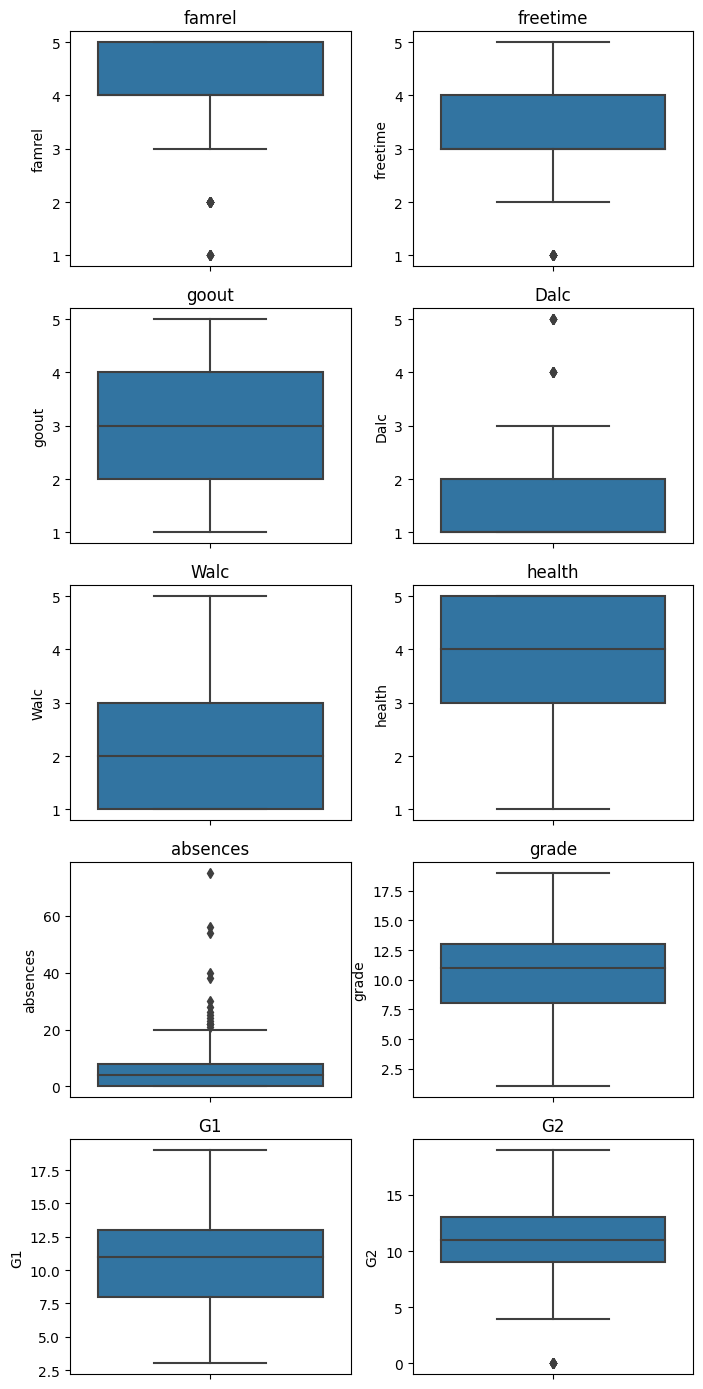

In [9]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(7,14))

for idx, col in enumerate(num_col):
    plt.subplot(5, 2, idx+1)
    plt.title(col)
    sns.boxplot(y=df[col])
    
plt.tight_layout()
plt.show();

absences 변수의 이상값 확인이 필요해 보인다.

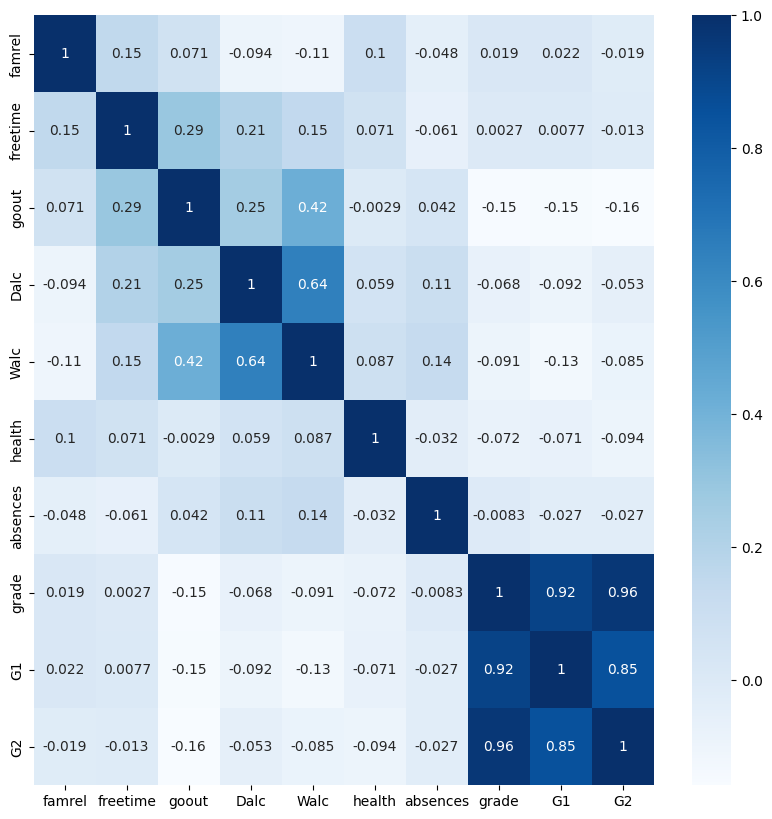

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show();

종속변수인 grade와 학기별 성적으로 유추되는 G1, G2간 상관관계는 강한 양의 상관관계를 보이는 것으로 확인된다.

### 1-2

In [6]:
import numpy as np
x = [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7]

n = len(x)
m = np.mean(x) # 표본평균
s = np.std(x)    # 표본의 표준편차

# t 분표 t(0.025, 8)
t = 2.31

print(m - t * (s / (n ** (1 / 2))))
print(m + t * (s / (n ** (1 / 2))))

3.5005759820981837
4.277201795679594


In [5]:
# z 분포 z(0.025) = 1.96
z = 1.96

# 표준오차
se = 0.04 / (n ** (1 / 2))

print(m - z * se)
print(m + z * se)

3.8627555555555557
3.915022222222222


In [3]:
mu = 15.5
s = 3.2 ** (1/2)
n = 12
df = n-1
conf_a = 1 - 0.9
se = s / n ** (1/2)

from scipy.stats import t
conf_t = t.ppf(1 - conf_a / 2, df)
me = conf_t * se

print(mu - me, mu + me)

14.572609067393861 16.427390932606137


In [4]:
data = [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7]
data

[3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7]

In [10]:
import numpy as np
n = len(data)
S = np.std(data)
X = np.mean(data)
conf_a = 1 - 0.95
df = n-1

SE = S / (n ** (1 / 2))

from scipy.stats import t

t_stats = t.ppf(1-conf_a/2, df)

print(X - 2.306 * SE, X + 2.306 * SE)
print(X - t_stats * SE, X + t_stats * SE)

3.5012483853999856 4.276529392377792
3.501247690297463 4.276530087480315


In [11]:
p = 0.9 # 
ME = 0.05
conf_a = 0.05

from scipy.stats import norm

conf_z = norm.ppf(1 - conf_a / 2)

p * (1 - p) * ((conf_z / ME) ** 2) 

138.29251754498844

In [29]:
n = 10 # 표본수
s2 = 90 # 분산
conf_a = 1 - 0.95 # 유의수준
df = n - 1 # 자유도

from scipy.stats import chi2

chi_stats_1 = chi2.ppf(1 - conf_a / 2, df)
chi_stats_2 = chi2.ppf(conf_a / 2, df)

print(f'{df * s2 / chi_stats_1:.3f}, {df * s2 / chi_stats_2:.3f}')

42.581, 299.957


In [1]:
(5000 / 3000) ** (1/2)

1.2909944487358056

In [2]:
n = 20
s2 = 90 ** 2
df = n - 1
conf_a = 1 - 0.95

import scipy.stats as stats

conf_chi1 = stats.chi2.ppf(1 - conf_a / 2, df)
conf_chi2 = stats.chi2.ppf(conf_a / 2, df)

print(f'{df * s2 / conf_chi1:.3f}, {df * s2 / conf_chi2:.3f}')

4684.600, 17279.483


In [3]:
n = 20
mu = 24
std = 9
conf_a = 1 - 0.95

df = n - 1

# 신뢰구간
t_stats = stats.t.ppf(conf_a / 2, df)

mu + t_stats * 9 / (20 ** (1/2)), mu - t_stats * 9 / (20 ** (1/2))

(19.787870342220813, 28.212129657779187)

In [4]:
t = 24 / (9 / (20 ** (1/2)))

In [6]:
t

11.925695879998878

검정통계량 t가 신뢰구간을 벗어나므로 귀무가설을 기각하고 연구가설을 채택한다. 즉, 통계적으로 혈압약 투약 이전과 이후의 차이가 있다.

In [8]:
import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem5.csv',encoding='cp949')
df.head()

,출하 소요시간,공장명,공장별 출하 소요시간 순위
0,71,Z,11
1,75,X,14
2,71,X,12
3,53,Z,1
4,50,X,1


In [13]:
x = df[df['공장명'] == 'X']['공장별 출하 소요시간 순위']
y = df[df['공장명'] == 'Y']['공장별 출하 소요시간 순위']
z = df[df['공장명'] == 'Z']['공장별 출하 소요시간 순위']

In [14]:
stats.kruskal(x, y, z)

KruskalResult(statistic=0.1249463430741201, pvalue=0.9394382661600987)

In [4]:
import numpy as np

np.sum([0.26127237, 0.16190249, 0.15541091, 0.1151391, 0.09011216, 0.06536976])

0.84920679

In [5]:
(5000/3000) ** (1/2)

1.2909944487358056

In [56]:
n, w, num = 13, 3, 6

나는 정리된 택배 상자와 동형인 이중 리스트를 만들어
실제로 꺼내려는 num번 상자의 index가 존재하는 층부터
윗 층에 놓인 상자, 즉 다음 리스트부터 마지막 리스트까지
num번 상자와 같은 index의 원소를 추출하여
총 추출된 택배의 갯수를 세는 방향으로 코딩할 계획을 잡았다.

(n // w) + 1 번 for 문 반복을 통해 불필요한 반복을 최소화하고
각 층의 택배, 즉 층별 리스트는 w개 만큼 생성되지만,
마지막 택배 번호인 n번 보다 큰 택배의 번호는 0으로 치환하여
최종 추출 시에 제외하고 추출하여 IndexError를 방지했다.

코드는 아래와 같다.

In [65]:
def solution(n, w, num):
    packages = [] # 전체 택배 컨테이너
    
    # (n // w) + 1 = 택배가 쌓인 층 수
    for floor in range((n // w) + 1):
        # 각 층별 택배 리스트 생성 (마지막 택배 번호 n번 보다 큰 택배는 0으로 치환)
        width = [pack if pack <= n else 0 for pack in (range(floor * w + 1, (floor + 1) * w + 1))]
        # 짝수 층은 정방향, 홀수 층은 역방향 리스트로 저장
        width = width if floor % 2 == 0 else width[::-1]
        # packages 컨테이너에 추가하여 이중 리스트 생성
        packages.append(width)
        
        # Loop마다 생성된 width 리스트에 num이 존재한다면
        if num in width:
            # 꺼내야되는 인덱스 번호 추출
            package_idx = width.index(num)
            # 꺼내야되는 택배의 층 번호 추출
            floor_idx = floor
            
    # packages를 enumerate로 추출해 Index가 floor_idx보다 큰 width만 추출하며, width[package_idx] 가 0이 아닌 원소만 추출
    return len([width[package_idx] for idx, width in enumerate(packages) if idx >= floor_idx and width[package_idx] != 0])

In [66]:
solution(n, w, num)

4

In [34]:
totals = []
baggages = []

for number in range((n // w) + 1):
    start = number * w + 1
    end = (number + 1) * w + 1
    width = list(range(start, end)) if number % 2 == 0 else list(range(start, end))[::-1]
    totals.append(width)

    if num in width:
        post_idx = width.index(num)
        loop_idx = number

# 인덱스를 찾고 해당 값을 만족하는 리스트를 필터링
print(totals)
valid_elements = [ele[post_idx] for idx, ele in enumerate(totals) if idx >= loop_idx and ele[post_idx] != 0]

valid_elements

[[1, 2, 3, 4, 5, 6], [12, 11, 10, 9, 8, 7], [13, 14, 15, 16, 17, 18], [24, 23, 22, 21, 20, 19]]


[8, 17, 20]

In [53]:
[1, 2, 3][4]

IndexError: list index out of range

In [68]:
(13 // 3 ) + 1

5